In this notebook, we will demonstrate how `TableAutomization.py` can be used for PDE type of problems. We will use 1D heat equation as an example.

In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
from utilities import TableAutomization as TA
import benchmarksClass as BC 
import matplotlib.pyplot as plt

## 1D Heat Equation
The PDE is given by:

$$ \frac{\partial u(\xi,\tau)}{\partial \tau} - c^2 \Delta_\xi u(\xi,\tau)   = f(\xi,\tau), \;\text{in}\;[0,1] $$
$$u(0,\tau)= u(L,\tau)= 0 $$

where $u(\xi,\tau)$ is the temperature and $c^2$ is the thermal diffusivity (assumed to be 1 here). We assume the source term $f$ is zero. The unknown parameters (random variable) for this test problem is the initial heat profile $g(\xi):=u(\xi,0)$.

The data $y$ is a random variable containing the temperature measurements everywhere in the domain at the final time $\tau^\mathrm{max}$(assumed to be 0.02 here) corrupted by Gaussian noise(We use $\sigma_\text{noise}=0.02$ here):

$$y = \mathcal{G}(g) + \eta, \;\;\; \eta\sim\mathrm{Gaussian}(0,\sigma_\text{noise}^2\mathbf{I}),$$ 

where $\mathcal{G}(g)$ is the forward model that maps the initial condition $g$ to the final time solution via solving the 1D time-dependent heat problem. $\eta$ is the measurement noise.

Given observed data $y^\text{obs}$ the task is to infer the initial heat profile $g$.

We use finite difference method to solve the problem and set the number of nodes as 30 here.

###  parameterization

Here, we parametarize random varable $g(\xi)$ as stepfunction, that is ,the number of parameter we use is the number of steps. We use 3 steps in this example.

This is a graph to show the example of what the step function looks like.

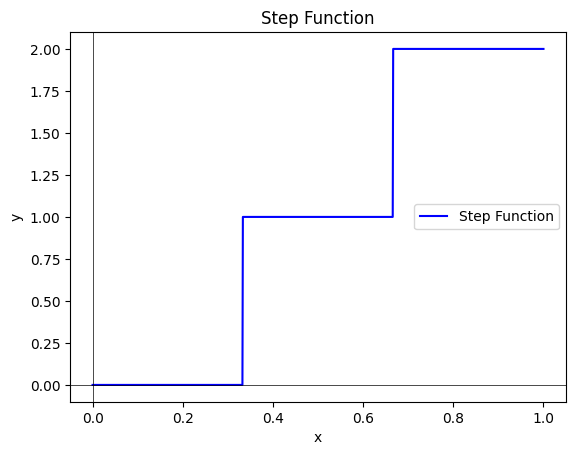

In [7]:
# Define the step function
def step_function_example(x):
    return np.where(x >= 2/3, 2, np.where(x >= 1/3, 1, 0))

x = np.linspace(0, 1, 1000)


y = step_function_example(x)

plt.plot(x, y, label='Step Function', color='blue')
plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

We set the prior as an i.i.d multivariate Gaussian with mean $0$ and variance $1.2^2$. 
And we are using observed data in data_heat.npy

## Sampling from posterior distribution

In [3]:
target_heatstep = BC.HeatStep()
x0 = BC.HeatStep().x0

<bound method Posterior._gradient of Posterior(
    Equation:
	 p(x|y) ∝ L(x|y)p(x)
    Densities:
	y ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 )>
<bound method Posterior._gradient of Posterior(
    Equation:
	 p(x|y) ∝ L(x|y)p(x)
    Densities:
	y ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 )>


In [3]:
df = TA.create_comparison(dim = 3, target= target_heatstep, x0 = x0,scale = [1,1,1], Ns = 100, Nb= 1, seed = 12,chains=3,selected_methods=["MH_fixed", "CWMH","ULA"])

Sample 101 / 101

Average acceptance rate: 0.09 

Sample 101 / 101

Average acceptance rate all components: 0.06 



NotImplementedError: Gradient not implemented for distribution Posterior(
    Equation:
	 p(x|y) ∝ L(x|y)p(x)
    Densities:
	y ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 ) with geometry StepExpansion(3,)

In [4]:
TA.print_table(df)

+----------+---------+----------+-------+----------+----------+-----+--------+----------+-----------+-----------+
|  Method  | Samples | Burn-ins | Scale | ESS(max) | ESS(min) |  AR | LogPDF | Gradient | Rhat(max) | Rhat(min) |
+----------+---------+----------+-------+----------+----------+-----+--------+----------+-----------+-----------+
| MH_fixed |   100   |    1     |   1   |  11.935  |  2.229   | 0.1 |  202   |    0     |   1.628   |   1.254   |
|   CWMH   |   100   |    1     |   1   |  11.872  |  2.527   | 0.1 |  602   |    0     |   2.856   |   2.022   |
+----------+---------+----------+-------+----------+----------+-----+--------+----------+-----------+-----------+
